In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
plt.style.use('seaborn-dark')
plt.style.context('grayscale')
import missingno as msno
%matplotlib inline

C:\Users\DELL\AppData\Local\Temp\ipykernel_9476\1536136690.py:7: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



In [3]:
df = pd.read_csv('Sleep_Efficiency.csv')

In [4]:
df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [5]:
df.isnull().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

In [7]:
df.rename(columns = {'Wakeup time':'Wakeup_time', 'Sleep duration':"Sleep_duration", "Sleep efficiency":"Sleep_efficiency","REM sleep percentage":"REM_sleep_percentage", "Deep sleep percentage":"Deep_sleep_percentage", "Light sleep percentage":"Light_sleep_percentage", "Caffeine consumption":"Caffeine_consumption", "Alcohol consumption":"Alcohol_consumption", "Smoking status":"Smoking_status", "Exercise frequency":"Exercise_frequency"}, inplace = True)

In [8]:
df.info

<bound method DataFrame.info of       ID  Age  Gender              Bedtime          Wakeup_time  \
0      1   65  Female  2021-03-06 01:00:00  2021-03-06 07:00:00   
1      2   69    Male  2021-12-05 02:00:00  2021-12-05 09:00:00   
2      3   40  Female  2021-05-25 21:30:00  2021-05-25 05:30:00   
3      4   40  Female  2021-11-03 02:30:00  2021-11-03 08:30:00   
4      5   57    Male  2021-03-13 01:00:00  2021-03-13 09:00:00   
..   ...  ...     ...                  ...                  ...   
447  448   27  Female  2021-11-13 22:00:00  2021-11-13 05:30:00   
448  449   52    Male  2021-03-31 21:00:00  2021-03-31 03:00:00   
449  450   40  Female  2021-09-07 23:00:00  2021-09-07 07:30:00   
450  451   45    Male  2021-07-29 21:00:00  2021-07-29 04:00:00   
451  452   18    Male  2021-03-17 02:30:00  2021-03-17 10:00:00   

     Sleep_duration  Sleep_efficiency  REM_sleep_percentage  \
0               6.0              0.88                    18   
1               7.0              0.66

In [9]:
df.head()

,ID,Age,Gender,Bedtime,Wakeup_time,Sleep_duration,Sleep_efficiency,REM_sleep_percentage,Deep_sleep_percentage,Light_sleep_percentage,Awakenings,Caffeine_consumption,Alcohol_consumption,Smoking_status,Exercise_frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [10]:
df.Age.value_counts()

52    19
27    19
37    18
48    17
40    17
      ..
15     1
11     1
9      1
16     1
12     1
Name: Age, Length: 61, dtype: int64

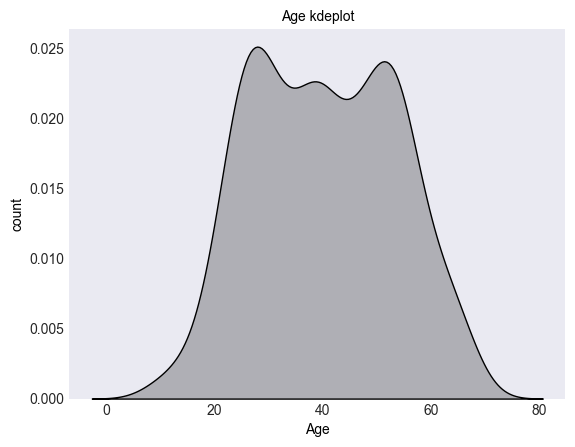

In [11]:
sns.kdeplot(data=df, x="Age", color="black", fill=True)
plt.xlabel('Age', color='black', fontsize=10)
plt.ylabel('count', color='black', fontsize=10)
plt.title("Age kdeplot", color='black', fontsize=10)
plt.show()

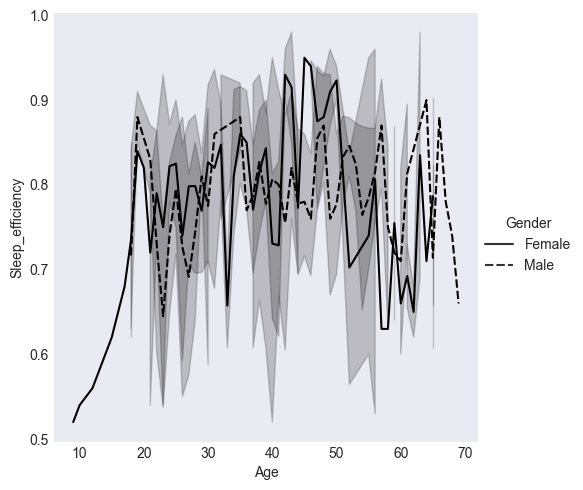

In [13]:
sns.relplot(data=df, kind="line", x='Age', y="Sleep_efficiency", style="Gender", color='black')
plt.show()

In [14]:
df.Gender.value_counts()

Male      228
Female    224
Name: Gender, dtype: int64

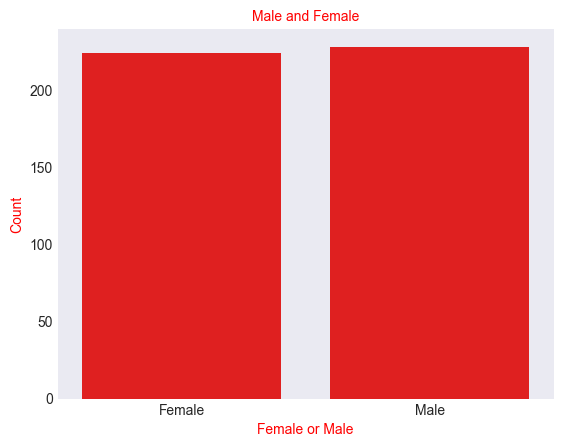

In [15]:
sns.countplot(data=df, x="Gender", color='red')
plt.xlabel('Female or Male', color='red', fontsize=10)
plt.ylabel('Count', color='red', fontsize=10)
plt.title('Male and Female', color='red', fontsize=10)
plt.show()

In [16]:
df.Smoking_status.value_counts()

No     298
Yes    154
Name: Smoking_status, dtype: int64

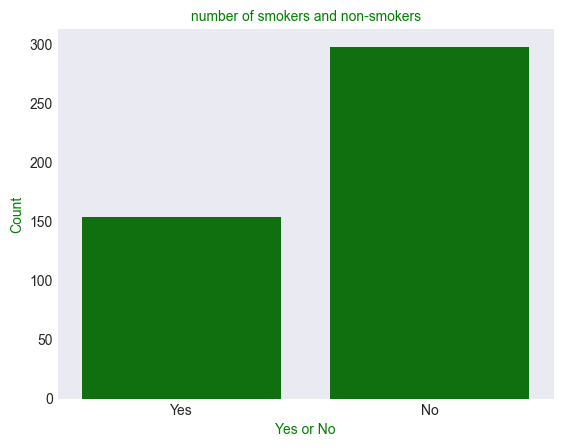

In [17]:
sns.countplot(data=df, x='Smoking_status', color='green')
plt.xlabel("Yes or No", color='green', fontsize=10)
plt.ylabel("Count", color='green', fontsize=10)
plt.title('number of smokers and non-smokers', color='green', fontsize=10)

plt.show()

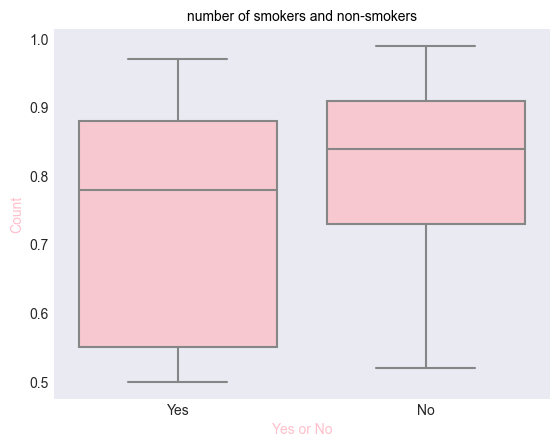

In [20]:
sns.boxplot(data=df, x='Smoking_status', y='Sleep_efficiency', color='pink')
plt.xlabel('Yes or No', color='pink', fontsize=10)
plt.ylabel('Count', color='pink', fontsize=10)
plt.title('number of smokers and non-smokers', color='black', fontsize=10)

plt.show()

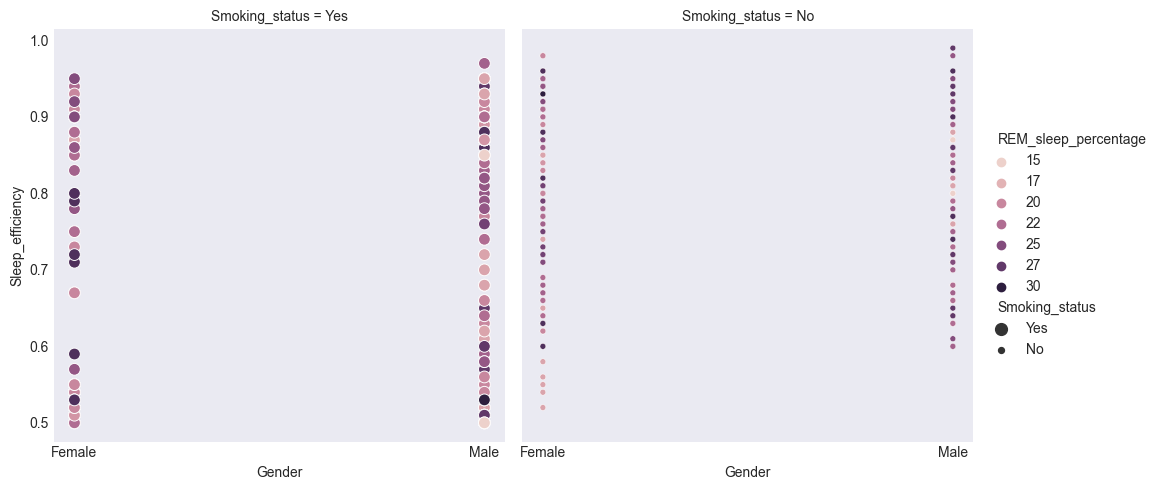

In [21]:
sns.relplot(data=df, x='Gender', y='Sleep_efficiency', col='Smoking_status', hue='REM_sleep_percentage', size='Smoking_status')

plt.show()

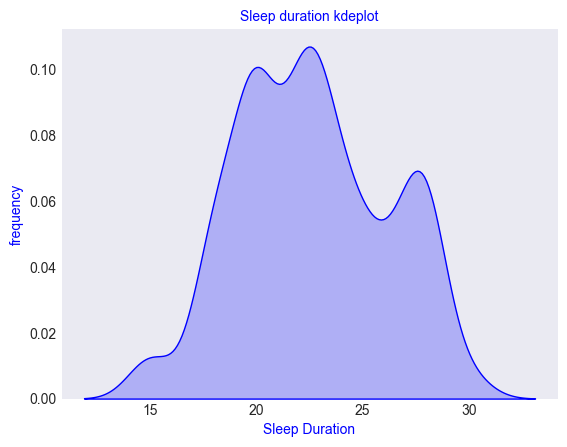

In [22]:
sns.kdeplot(data=df, x='REM_sleep_percentage', color='blue', fill=True)
plt.xlabel('Sleep Duration', color='blue', fontsize=10)
plt.ylabel('frequency', color='blue', fontsize=10)
plt.title('Sleep duration kdeplot', color='blue', fontsize=10)

plt.show()

In [23]:
df.Exercise_frequency.value_counts()

3.0    130
0.0    116
1.0     97
2.0     54
4.0     41
5.0      8
Name: Exercise_frequency, dtype: int64

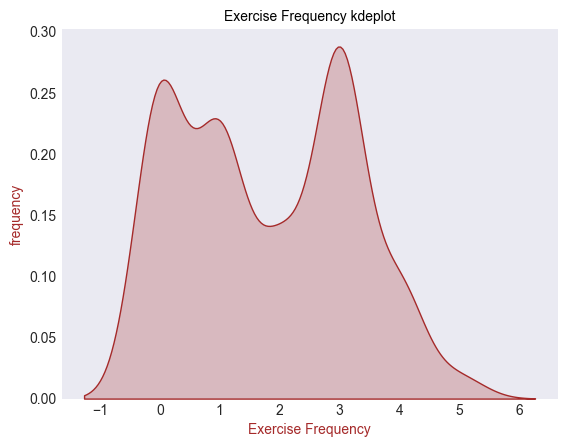

In [24]:
sns.kdeplot(data=df, x='Exercise_frequency', color='brown', fill=True)
plt.xlabel('Exercise Frequency', color='brown', fontsize=10)
plt.ylabel('frequency', color='brown', fontsize=10)
plt.title('Exercise Frequency kdeplot', color='black', fontsize=10)

plt.show()

In [25]:
df.Alcohol_consumption.value_counts()

0.0    246
1.0     54
3.0     48
2.0     37
5.0     30
4.0     23
Name: Alcohol_consumption, dtype: int64

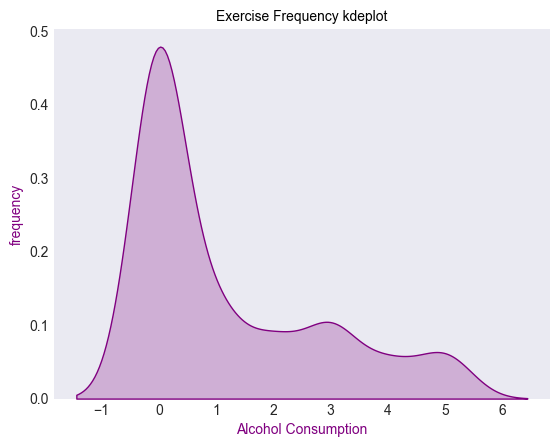

In [26]:
sns.kdeplot(data=df, x='Alcohol_consumption', color='purple', fill=True)
plt.xlabel('Alcohol Consumption', color='purple', fontsize=10)
plt.ylabel('frequency', color='purple', fontsize=10)
plt.title('Exercise Frequency kdeplot', color='black', fontsize=10)

plt.show()

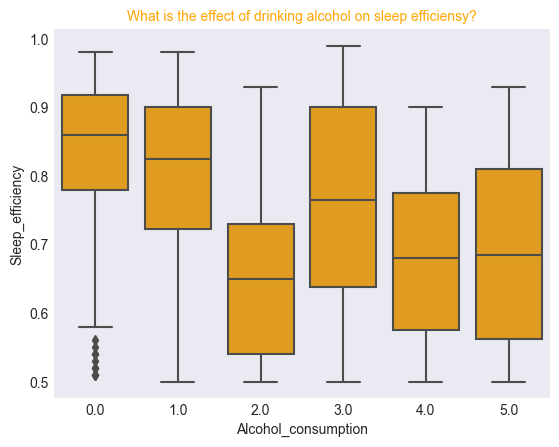

In [27]:
sns.boxplot(data=df, x='Alcohol_consumption', y='Sleep_efficiency', color='orange')
plt.title('What is the effect of drinking alcohol on sleep efficiensy?', color='orange', fontsize=10)

plt.show()

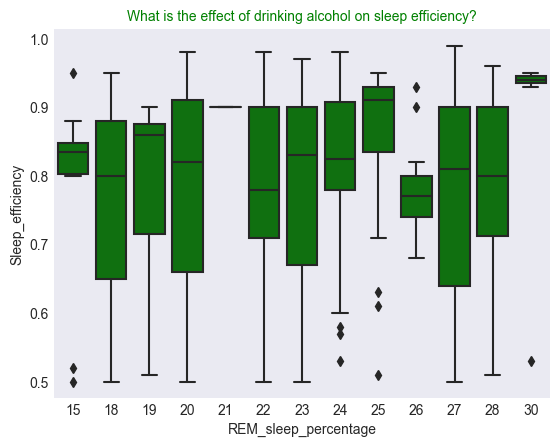

In [28]:
sns.boxplot(data=df, x='REM_sleep_percentage', y='Sleep_efficiency', color='green')
plt.title('What is the effect of drinking alcohol on sleep efficiency?', color='green', fontsize=10)
plt.show()

In [29]:
df.Caffeine_consumption.value_counts()

0.0      211
50.0     107
25.0      79
75.0      25
200.0      4
100.0      1
Name: Caffeine_consumption, dtype: int64

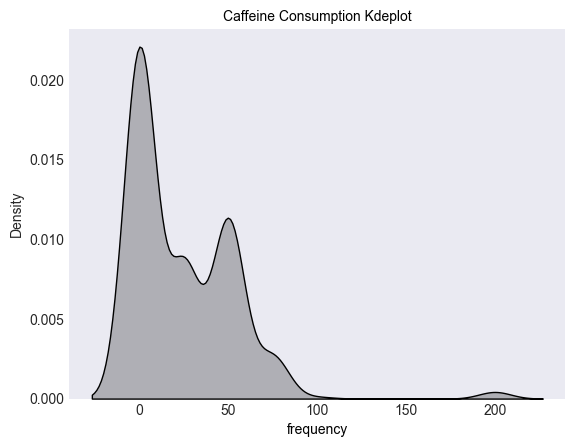

In [31]:
sns.kdeplot(data=df, x='Caffeine_consumption', color='black', fill=True)
plt.xlabel('Caffeine Consumption', color='black', fontsize=10)
plt.xlabel('frequency', color='black', fontsize=10)
plt.title('Caffeine Consumption Kdeplot', color='black', fontsize=10)
plt.show()

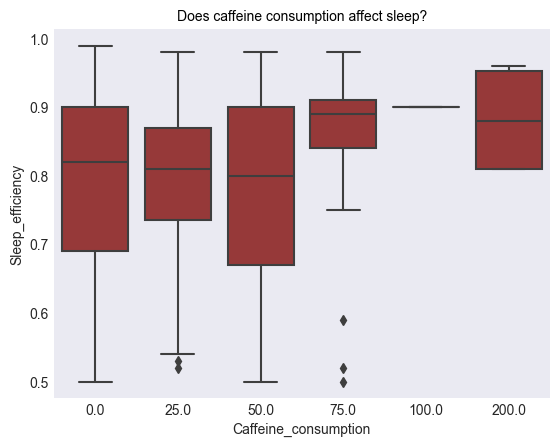

In [33]:
sns.boxplot(data=df, x='Caffeine_consumption', y='Sleep_efficiency', color='brown')
plt.title('Does caffeine consumption affect sleep?', color='black', fontsize=10)
plt.show()

In [34]:
df.Awakenings.value_counts()

1.0    154
0.0     95
3.0     63
4.0     63
2.0     57
Name: Awakenings, dtype: int64

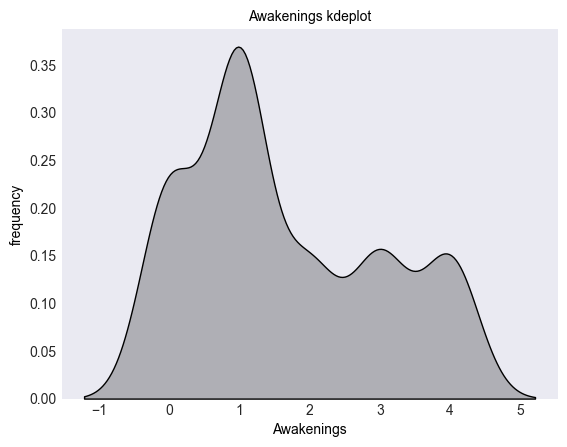

In [36]:
sns.kdeplot(data=df, x='Awakenings', color='black', fill=True)
plt.xlabel('Awakenings', color='black', fontsize=10)
plt.ylabel('frequency', color='black', fontsize=10)
plt.title('Awakenings kdeplot', color='black', fontsize=10)
plt.show()

In [37]:
df.Light_sleep_percentage.value_counts()

20    52
15    49
17    46
18    45
10    34
13    32
12    28
45    20
21    17
52    16
47    16
53    13
55    13
16    12
19    11
48    10
54     8
50     7
22     4
56     3
51     3
14     3
7      3
11     2
62     1
46     1
30     1
40     1
63     1
Name: Light_sleep_percentage, dtype: int64

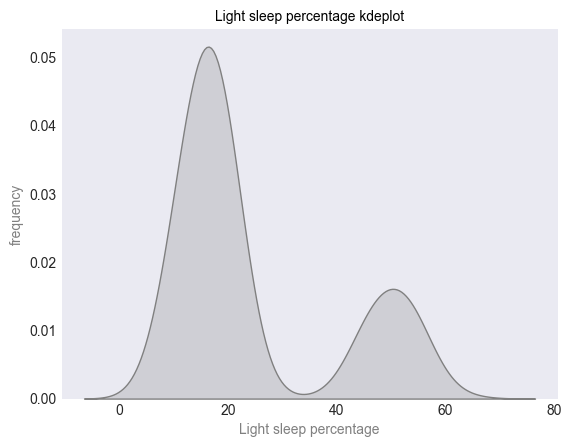

In [40]:
sns.kdeplot(data=df, x='Light_sleep_percentage', color='gray', fill=True)
plt.xlabel('Light sleep percentage', color='gray', fontsize=10)
plt.ylabel('frequency', color='gray', fontsize=10)
plt.title('Light sleep percentage kdeplot', color='black', fontsize=10)
plt.show()

In [41]:
df.Deep_sleep_percentage.value_counts()

60    70
65    44
55    43
57    35
70    34
35    27
58    26
63    20
67    19
20    18
25    17
22    12
62     9
59     9
56     9
23     8
72     8
30     8
28     7
32     6
52     5
75     4
24     4
37     3
53     2
51     2
27     1
18     1
40     1
Name: Deep_sleep_percentage, dtype: int64

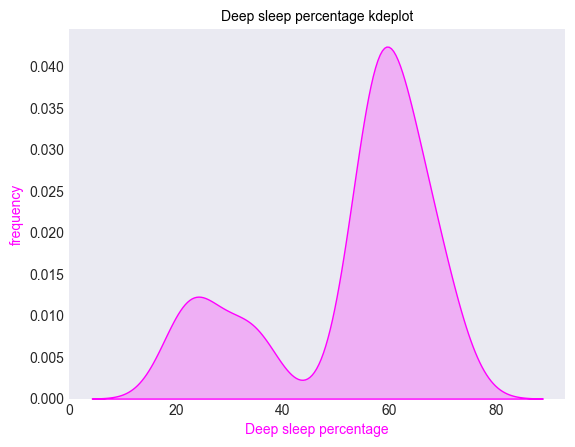

In [43]:
sns.kdeplot(data=df, x='Deep_sleep_percentage', color='magenta', fill=True)
plt.xlabel('Deep sleep percentage', color='magenta', fontsize=10)
plt.ylabel('frequency', color='magenta', fontsize=10)
plt.title('Deep sleep percentage kdeplot', color='black', fontsize=10)
plt.show()

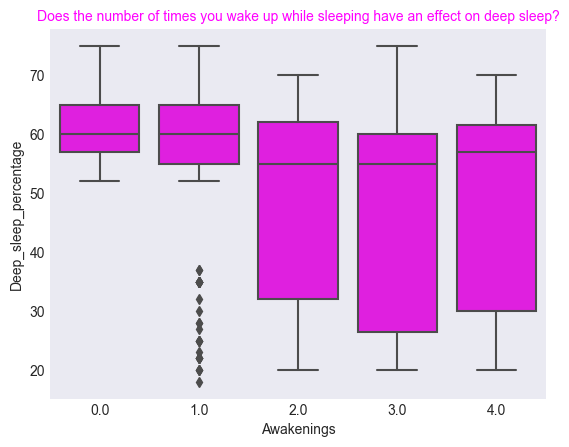

In [44]:
sns.boxplot(data=df, x='Awakenings', y='Deep_sleep_percentage', color='magenta')
plt.title('Does the number of times you wake up while sleeping have an effect on deep sleep?', color='magenta', fontsize=10)
plt.show()

In [45]:
df.REM_sleep_percentage.value_counts()

20    92
22    67
28    58
23    56
18    49
25    31
24    26
27    25
26    15
15    14
19    11
30     7
21     1
Name: REM_sleep_percentage, dtype: int64

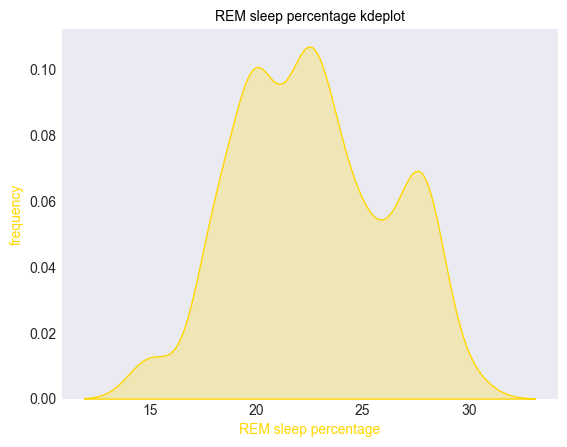

In [47]:
sns.kdeplot(data=df, x='REM_sleep_percentage', color='gold', fill=True)
plt.xlabel('REM sleep percentage', color='gold', fontsize=10)
plt.ylabel('frequency', color='gold', fontsize=10)
plt.title('REM sleep percentage kdeplot', color='black', fontsize=10)
plt.show()

In [48]:
df.Sleep_efficiency.value_counts()

0.90    29
0.93    22
0.87    22
0.95    21
0.91    19
0.94    18
0.92    13
0.77    13
0.88    13
0.81    12
0.86    12
0.84    12
0.85    12
0.72    12
0.80    11
0.82    11
0.71    11
0.83    10
0.52     9
0.68     9
0.78     9
0.63     9
0.75     8
0.50     8
0.64     8
0.79     8
0.67     8
0.54     8
0.51     8
0.76     7
0.73     7
0.66     7
0.89     7
0.55     7
0.96     7
0.53     6
0.60     6
0.65     4
0.74     4
0.62     4
0.98     4
0.70     3
0.58     3
0.61     2
0.57     2
0.56     2
0.59     2
0.99     1
0.69     1
0.97     1
Name: Sleep_efficiency, dtype: int64

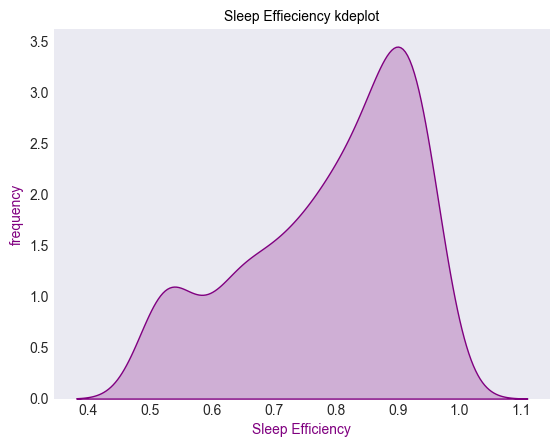

In [49]:
sns.kdeplot(data=df, x='Sleep_efficiency', color='purple', fill=True)
plt.xlabel('Sleep Efficiency', color='purple', fontsize=10)
plt.ylabel('frequency', color='purple', fontsize=10)
plt.title('Sleep Effieciency kdeplot', color='black', fontsize=10)
plt.show()

In [50]:
df.head()

,ID,Age,Gender,Bedtime,Wakeup_time,Sleep_duration,Sleep_efficiency,REM_sleep_percentage,Deep_sleep_percentage,Light_sleep_percentage,Awakenings,Caffeine_consumption,Alcohol_consumption,Smoking_status,Exercise_frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [51]:
df['Date'] = pd.to_datetime(df['Bedtime'], errors='coerce')
df['day'] = (df['Date']).dt.day
df['month'] = (df['Date']).dt.month
df['year'] = (df['Date']).dt.year
df['hour'] = (df['Date']).dt.hour

In [52]:
fig = px.pie(df, names='hour')
fig.show()